In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',  as_frame=False)



In [7]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [12]:
mnist.data[0].shape

(784,)

In [14]:
mnist.target[0]

'5'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

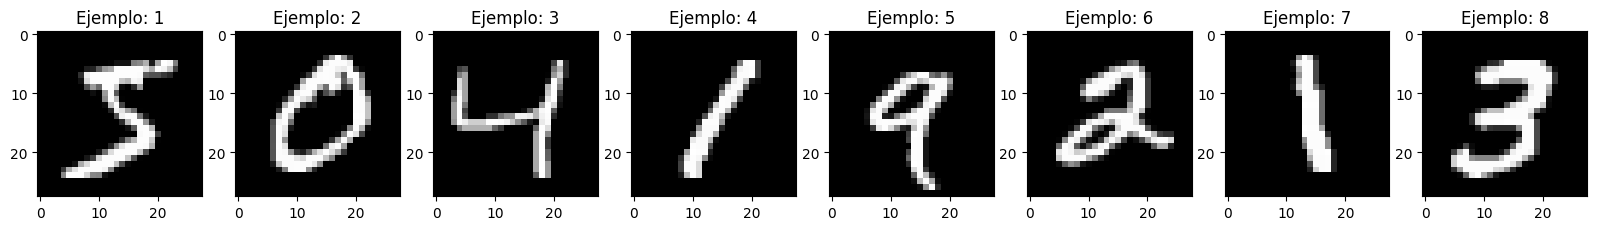

In [18]:
plt.figure(figsize=(20,4))

for index, img in zip(range(1,9), mnist.data[:8]):
    plt.subplot(1,8,index)
    plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: {}'.format(index))

plt.show()


In [19]:
mnist.target[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [20]:
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.25)


In [22]:
print(len(X_train))

52500


In [23]:
from sklearn.linear_model import Perceptron


In [26]:
clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)

In [27]:
clf.fit(X_train, Y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,-1
,random_state,40


In [30]:
clf.predict([X_test[0]])

/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array(['6'], dtype='<U1')

In [31]:
Y_test[0]

'6'

In [38]:
y_pred = clf.predict(X_test)

/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/cursoPython/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [33]:
y_pred

array(['6', '1', '9', ..., '6', '6', '8'], shape=(17500,), dtype='<U1')

In [34]:
len(y_pred)

17500

In [35]:
len(Y_test)

17500

In [36]:
from sklearn.metrics import f1_score

In [39]:
f1_score(Y_test, y_pred, average="weighted")

0.848736907974619

In [41]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for etiqueta, predict in zip(Y_test, y_pred):
    if etiqueta != predict:
        index_errors.append(index)

    index += 1


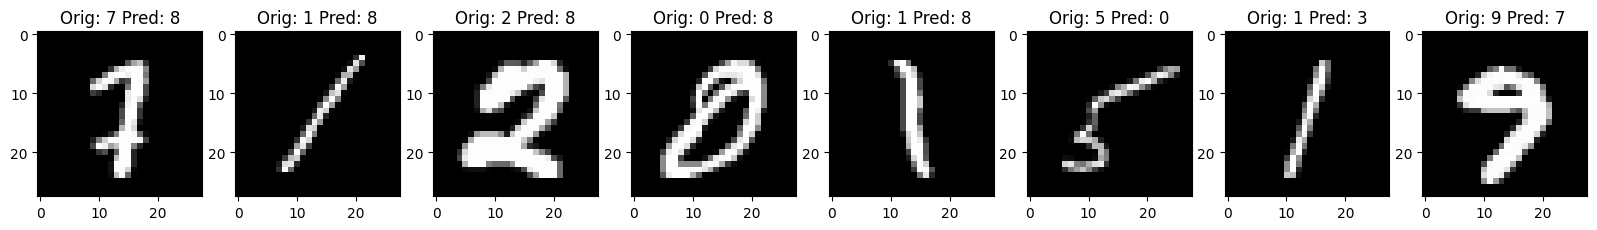

In [47]:
plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1,9), index_errors[8:16]):
    plt.subplot(1,8,i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig: '+ str(Y_test[img_index]) + ' Pred: ' + str(y_pred[img_index]))

plt.show()